<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-ai-journey/blob/main/Lecture_14_deep_learning_dropout_practice_using_regression_data/Lecture_14_deep_learning_dropout_practice_using_regression_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Generation:**

The notebook starts by generating synthetic training and testing data for a regression problem. The data consists of independent variable x and dependent variable y.

# **Initial Regression Model:**

A sequential neural network model is defined and trained to perform regression on the generated data.

The model uses Dense layers with ReLU activation and a linear output layer.

# **Model Evaluation:**

The performance of the initial regression model is evaluated using the mean squared error on both the training and testing data.

The training and validation loss over epochs are also plotted.

# **Dropout Model:**

To address potential overfitting, a new sequential model is defined that includes Dropout layers with a dropout rate of 0.5.

# **Dropout Model Evaluation:**

The performance of the dropout model is evaluated using the mean squared error on the training and testing data, and the predictions and loss curves are plotted, showing the effect of dropout on the model's training and generalization.

In [59]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate Data

In [60]:
# Generate synthetic training data for the independent variable (x)
x_train = np.linspace(-1 , 1 , 20)

In [61]:
# Generate synthetic training data for the dependent variable (y)
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [62]:
# Generate synthetic testing data for the independent variable (x)
x_test = np.linspace(-1, 1, 20)

In [63]:
# Display the generated testing data for x
x_test

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [64]:
# Generate synthetic testing data for the dependent variable (y)
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

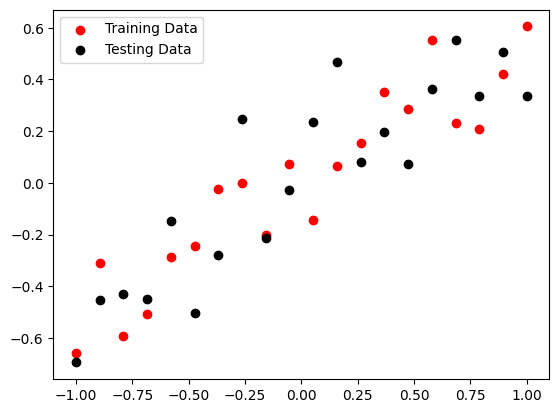

In [65]:
# Scatter plot of training and testing data
plt.scatter(x_train , y_train , color = 'red' , label='Training Data')
plt.scatter(x_train , y_test , color = 'black' , label='Testing Data')
plt.legend() # Show legend
plt.show() # Display the plot

# Regression Model

In [66]:
# Define the regression model architecture
model = Sequential()

# Add a dense layer with 128 units, input dimension of 1, and ReLU activation
model.add(Dense(128 ,input_dim = 1 , activation = 'relu' ) )
# Add another dense layer with 128 units and ReLU activation
model.add(Dense(128 , activation='relu'))

# Add the output layer with 1 unit and linear activation for regression
model.add(Dense(1, activation='linear'))

# Define the Adam optimizer with a learning rate of 0.01
adam = Adam(learning_rate=0.01)

# Compile the model with mean squared error loss and metric

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
# Compile the model specifying the loss function, optimizer, and metrics
model.compile(loss='mse' , optimizer=adam , metrics=['mse'])

In [68]:
# Train the model using the training data, with validation on the testing data
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=False)

# evaluate the model

In [69]:
# Evaluate the trained model on the training and testing data to get the mean squared error
_, train_mse = model.evaluate(x_train, y_train, verbose=0)
_, test_mse = model.evaluate(x_test, y_test, verbose=0)
# Print the mean squared error for both training and testing sets
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.011, Test: 0.035


In [70]:
# Make predictions on the test data using the trained model
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


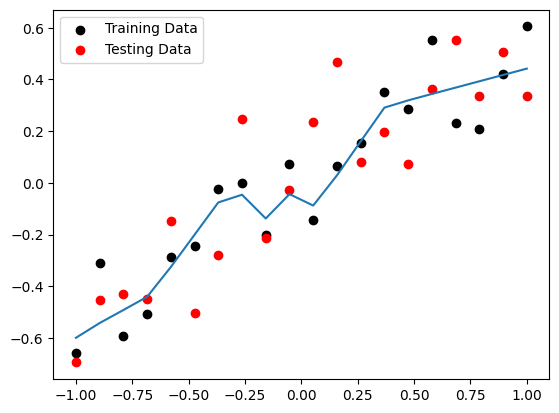

In [71]:
# Plot the training data, testing data, and the model's predictions
plt.figure()
plt.scatter(x_train, y_train, color='black', label='Training Data')
plt.scatter(x_test, y_test, color= 'red', label='Testing Data')
plt.plot(x_test, y_pred) # Plot the predicted values
plt.legend() # Show legend
plt.show() # Display the plot

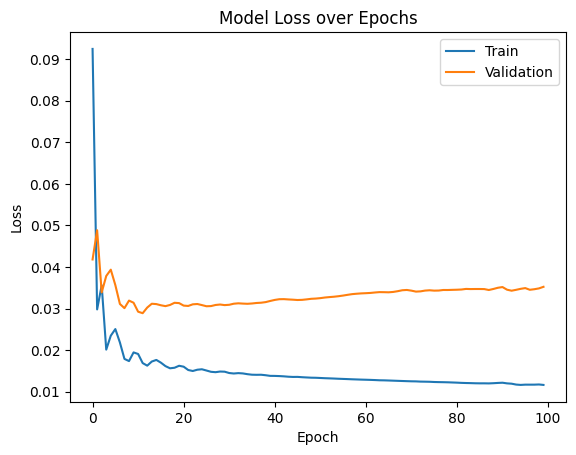

In [72]:
# Plot the training loss and validation loss over epochs
plt.plot(history.history['loss']) # Plot training loss
plt.plot(history.history['val_loss']) # Plot validation loss
# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss over Epochs')
plt.legend(['Train', 'Validation'])

# Dropout Model

In [73]:
# Define a new Sequential model with Dropout layers to combat overfitting
model = Sequential()

# Add a dense layer with 128 units, input dimension of 1, and ReLU activation
model.add(Dense(128 ,input_dim = 1 , activation = 'relu' ))
# Add a Dropout layer with a dropout rate of 0.5 (randomly drops 50% of neurons during training)
model.add(Dropout(0.5))
# Add another dense layer with 128 units and ReLU activation
model.add(Dense(128 , activation='relu'))
# Add another Dropout layer with a dropout rate of 0.5
model.add(Dropout(0.5))
# Add the output layer with 1 unit and linear activation for regression
model.add(Dense(1, activation='linear'))

# Define the Adam optimizer with a learning rate of 0.01
adam = Adam(learning_rate=0.01)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
# Compile the dropout model with mean squared error loss and metric
model.compile(loss='mse' , optimizer=adam , metrics=['mse'])

In [75]:
# Train the dropout model using the training data, with validation on the testing data, for more epochs
history = model.fit(x_train, y_train, epochs=125, validation_data=(x_test, y_test), verbose=False)

# evaluate the model

In [76]:
# Evaluate the trained dropout model on the training and testing data to get the mean squared error
_, train_mse = model.evaluate(x_train, y_train, verbose=0)
_, test_mse = model.evaluate(x_test, y_test, verbose=0)
# Print the mean squared error for both training and testing sets for the dropout model
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.016, Test: 0.031


In [77]:
# Make predictions on the test data using the trained dropout model
y_pred =model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


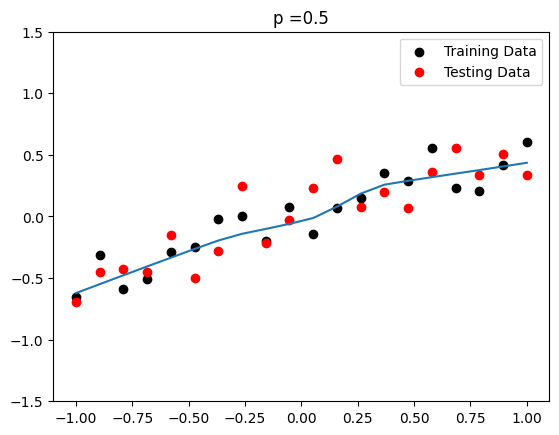

In [78]:
# Plot the training data, testing data, and the dropout model's predictions
plt.figure()
plt.title('p =0.5') # Add a title to the plot
plt.scatter(x_train, y_train, color='black', label='Training Data')
plt.scatter(x_test, y_test, color= 'red', label='Testing Data')
plt.plot(x_test, y_pred) # Plot the predicted values from the dropout model
plt.legend() # Show legend
plt.ylim(-1.5, 1.5) # Set the y-axis limits
plt.show() # Display the plot

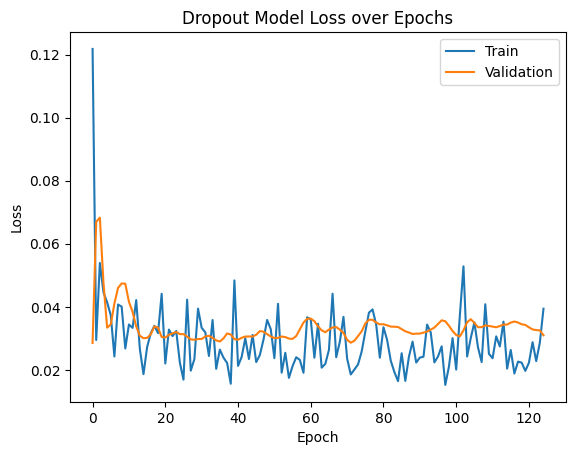

In [79]:
# Plot the training loss and validation loss over epochs for the dropout model
plt.plot(history.history['loss']) # Plot training loss
plt.plot(history.history['val_loss']) # Plot validation loss
# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Dropout Model Loss over Epochs')
plt.legend(['Train', 'Validation'])